In [6]:
### Instalacion de dependencias del proyecto

In [7]:
%pip install pandas openpyxl requests beautifulsoup4 matplotlib "kagglehub[pandas-datasets]>=0.3.8" seaborn pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from bdatos import Bdatos
from ingestar import Ingestar
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [9]:
### Importar librerias

In [10]:
### Descarga y carga del dataset desde Kaggle

try:
    ingestar
    print("Instancia de Ingestar ya existe")
except:
    ingestar = Ingestar()
    print("Nueva instancia de Ingestar creada")

try:
    print("Descargando dataset desde Kaggle...")
    dataset_path = ingestar.download_dataset_zip("samuelotiattakorah/agriculture-crop-yield")
    print(f"Dataset descargado en: {dataset_path}")
    
    data_dir = ingestar.extract_zip_files(dataset_path)
    print(f"Archivos extraidos en: {data_dir}")
    
    df_agriculture = ingestar.load_dataset_as_dataframe(data_dir)
    print(f"Dataset cargado como DataFrame: {df_agriculture.shape}")
    print("Columnas disponibles:", list(df_agriculture.columns))
    
except Exception as e:
    print(f"Error al descargar/cargar el dataset: {e}")
    print("Verificar conexion a internet y credenciales de Kaggle")

Nueva instancia de Ingestar creada
Descargando dataset desde Kaggle...
Descargando dataset desde Kaggle...


Ruta al dataset: /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1
Dataset descargado en: /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1
Archivos encontrados en la descarga: ['crop_yield.csv']
Se detectaron archivos CSV directamente en la carpeta descargada.
Archivos extraidos en: /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1
Leyendo CSV /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1/crop_yield.csv ...
✅ Dataset cargado correctamente en DataFrame.
Dataset cargado como DataFrame: (1000000, 10)
Columnas disponibles: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare']
✅ Dataset cargado correctamente en DataFrame.
Dataset cargado como DataFrame: (1000000, 10)
Columnas disponibles: ['

In [11]:
try:
    print("Iniciando limpieza y validacion de datos")
    print("=" * 50)
    
    print(f"Registros originales: {len(df_agriculture)}")
    print(f"Columnas originales: {list(df_agriculture.columns)}")
    
    df_clean = df_agriculture.copy()
    
    print("\nEliminando filas duplicadas...")
    df_clean = df_clean.drop_duplicates()
    print(f"Registros despues de eliminar duplicados: {len(df_clean)}")
    
    print("\nEliminando filas con valores nulos...")
    filas_antes = len(df_clean)
    df_clean = df_clean.dropna()
    print(f"Filas eliminadas: {filas_antes - len(df_clean)}")
    print(f"Registros despues de eliminar nulos: {len(df_clean)}")
    
    print("\nValidando y convirtiendo tipos de datos...")
    columnas_numericas = df_clean.select_dtypes(include=[np.number]).columns
    
    for col in columnas_numericas:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        if df_clean[col].dtype == 'float64':
            df_clean[col] = df_clean[col].round(2)
    
    df_clean = df_clean.dropna()
    
    columnas_texto = df_clean.select_dtypes(include=['object']).columns
    for col in columnas_texto:
        df_clean[col] = df_clean[col].astype(str).str.strip()
    
    print(f"Registros finales despues de validacion: {len(df_clean)}")
    
    print("\nTipos de datos finales:")
    print(df_clean.dtypes)
    
    print("\nEstadisticas de columnas numericas:")
    print(df_clean.describe())
    
    print("\n" + "=" * 50)
    print("Limpieza y validacion completada")
    
except Exception as e:
    print(f"Error en limpieza de datos: {e}")
    import traceback
    traceback.print_exc()

Iniciando limpieza y validacion de datos
Registros originales: 1000000
Columnas originales: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare']

Eliminando filas duplicadas...
Registros despues de eliminar duplicados: 1000000

Eliminando filas con valores nulos...
Filas eliminadas: 0
Registros despues de eliminar nulos: 1000000

Validando y convirtiendo tipos de datos...
Registros despues de eliminar duplicados: 1000000

Eliminando filas con valores nulos...
Filas eliminadas: 0
Registros despues de eliminar nulos: 1000000

Validando y convirtiendo tipos de datos...
Registros finales despues de validacion: 1000000

Tipos de datos finales:
Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used             

In [12]:
### Limpieza y validacion de datos del dataset

In [13]:
try:
    print("Agregando nuevos campos al dataset")
    print("=" * 50)
    
    np.random.seed(42)
    
    print("\nGenerando campo Trial_year (AAAA-MM-DD)...")
    años = np.random.randint(2016, 2020, size=len(df_clean))
    meses = np.random.randint(1, 13, size=len(df_clean))
    dias = np.random.randint(1, 29, size=len(df_clean))
    df_clean['Trial_year'] = [f"{año}-{mes:02d}-{dia:02d}" for año, mes, dia in zip(años, meses, dias)]
    
    print(f"Ejemplos de Trial_year generados: {df_clean['Trial_year'].head(10).tolist()}")
    
    print("\nGenerando campo Cost_Euros (rango: 879 - 12654)...")
    df_clean['Cost_Euros'] = np.random.randint(879, 12655, size=len(df_clean))
    
    print(f"Estadisticas de Cost_Euros:")
    print(f"  Minimo: {df_clean['Cost_Euros'].min()}")
    print(f"  Maximo: {df_clean['Cost_Euros'].max()}")
    print(f"  Promedio: {df_clean['Cost_Euros'].mean():.2f}")
    
    print(f"\nColumnas finales del dataset: {list(df_clean.columns)}")
    print(f"Total de registros: {len(df_clean)}")
    
    print("\nPrimeras 5 filas con los nuevos campos:")
    print(df_clean[['Region', 'Crop', 'Trial_year', 'Cost_Euros']].head())
    
    print("\n" + "=" * 50)
    print("Nuevos campos agregados exitosamente")
    
except Exception as e:
    print(f"Error al agregar nuevos campos: {e}")
    import traceback
    traceback.print_exc()

Agregando nuevos campos al dataset

Generando campo Trial_year (AAAA-MM-DD)...


Ejemplos de Trial_year generados: ['2018-01-20', '2019-07-19', '2016-06-27', '2018-07-13', '2018-11-20', '2019-08-16', '2016-05-17', '2016-10-19', '2018-05-13', '2017-07-08']

Generando campo Cost_Euros (rango: 879 - 12654)...
Estadisticas de Cost_Euros:
  Minimo: 879
  Maximo: 12654
  Promedio: 6771.32

Columnas finales del dataset: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Trial_year', 'Cost_Euros']
Total de registros: 1000000

Primeras 5 filas con los nuevos campos:
  Region     Crop  Trial_year  Cost_Euros
0   West   Cotton  2018-01-20        7723
1  South     Rice  2019-07-19        6439
2  North   Barley  2016-06-27        4245
3  North  Soybean  2018-07-13       11120
4  South    Wheat  2018-11-20        1602

Nuevos campos agregados exitosamente


In [14]:
### Agregar campos Trial_year y Cost_Euros

In [15]:
### Creacion de la base de datos, las tablas e insercion de datos

In [16]:
try:
    import importlib
    import bdatos
    importlib.reload(bdatos)
    from bdatos import Bdatos
    
    print("Clase Bdatos importada correctamente")
    
    bd_test = Bdatos("static/db/proyecto.db")
    
    df_muestra = df_clean.head(1000)
    
    print(f"Insertando muestra de {len(df_muestra)} filas en la base de datos...")
    exito = bd_test.insertar_dataframe(df_muestra, "Cultivos")
    
    if exito:
        print("Verificando insercion:")
        tablas = bd_test.listar_tablas()
        print(f"Tablas creadas: {tablas}")
        
        for tabla in tablas:
            filas = bd_test.contar_filas(tabla)
            print(f"  - {tabla}: {filas} filas")
        
        print("\nConsulta de prueba - primeras 5 filas:")
        resultado = bd_test.consultar("SELECT * FROM Cultivos LIMIT 5")
        print(resultado)
        
        print("\nEstadisticas por region:")
        stats = bd_test.consultar("""
            SELECT Region, 
                   COUNT(*) as total_registros,
                   AVG(Yield_tons_per_hectare) as rendimiento_promedio,
                   AVG(Rainfall_mm) as lluvia_promedio
            FROM Cultivos 
            GROUP BY Region
        """)
        print(stats)
    
    bd_test.cerrar_conexion()
    
except Exception as e:
    print(f"Error al probar Bdatos: {e}")
    import traceback
    traceback.print_exc()

Clase Bdatos importada correctamente
 Conectado a la base de datos: static/db/proyecto.db
Insertando muestra de 1000 filas en la base de datos...
 DataFrame insertado en tabla 'Cultivos' (1000 filas)
Verificando insercion:
Tablas creadas: ['Cultivos']
  - Cultivos: 1000 filas

Consulta de prueba - primeras 5 filas:
 Consulta ejecutada exitosamente (5 filas)
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton       897.08                27.68   
1  South      Clay     Rice       992.67                18.03   
2  North      Loam   Barley       148.00                29.79   
3  North     Sandy  Soybean       986.87                16.64   
4  South      Silt    Wheat       730.38                31.62   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0                0                1            Cloudy              122   
1                1                1             Rainy              140   
2                0         

In [17]:
try:
    bd_verificar = Bdatos("static/db/proyecto.db")
    
    print("VERIFICANDO BASE DE DATOS")
    print("=" * 50)
    
    tablas = bd_verificar.listar_tablas()
    print(f"Tablas existentes: {tablas}")
    
    for tabla in tablas:
        filas = bd_verificar.contar_filas(tabla)
        print(f"  - {tabla}: {filas} filas")
        
        if filas > 0:
            print(f"\nPrimeras 3 filas de {tabla}:")
            muestra = bd_verificar.consultar(f"SELECT * FROM {tabla} LIMIT 3")
            print(muestra)
    
    bd_verificar.cerrar_conexion()
    print("\n" + "=" * 50)
    
except Exception as e:
    print(f"Error al verificar base de datos: {e}")

 Conectado a la base de datos: static/db/proyecto.db
VERIFICANDO BASE DE DATOS
Tablas existentes: ['Cultivos']
  - Cultivos: 1000 filas

Primeras 3 filas de Cultivos:
 Consulta ejecutada exitosamente (3 filas)
  Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0   West     Sandy  Cotton       897.08                27.68                0   
1  South      Clay    Rice       992.67                18.03                1   
2  North      Loam  Barley       148.00                29.79                0   

   Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  \
0                1            Cloudy              122                    6.56   
1                1             Rainy              140                    8.53   
2                0             Sunny              106                    1.13   

   Trial_year  Cost_Euros  
0  2018-01-20        7723  
1  2019-07-19        6439  
2  2016-06-27        4245  
Conexión cerrada



In [18]:
### Verificar estado de la base de datos

In [19]:
### Generar csv con la informacion de la base de datos

In [20]:
try:
    bd_export = Bdatos("static/db/proyecto.db")
    
    print("Consultando datos de la tabla Cultivos...")
    df_cultivos = bd_export.consultar("SELECT * FROM Cultivos")
    
    if df_cultivos is not None and len(df_cultivos) > 0:
        export_path = "static/db/export.csv"
        
        columnas_originales = [col for col in df_cultivos.columns if col not in ['Trial_year', 'Cost_Euros']]
        df_export_original = df_cultivos[columnas_originales]
        
        df_export_original.to_csv(export_path, index=False)
        
        print(f"Datos originales exportados exitosamente a: {export_path}")
        print(f"Total de filas exportadas: {len(df_export_original)}")
        print(f"Total de columnas: {len(df_export_original.columns)}")
        
        import os
        if os.path.exists(export_path):
            file_size = os.path.getsize(export_path) / 1024
            print(f"Archivo creado exitosamente - Tamano: {file_size:.2f} KB")
        else:
            print("Error: No se pudo crear el archivo CSV")
    
    else:
        print("No se encontraron datos en la tabla Cultivos")
    
    bd_export.cerrar_conexion()
    
except Exception as e:
    print(f"Error al exportar a CSV: {e}")
    import traceback
    traceback.print_exc()

 Conectado a la base de datos: static/db/proyecto.db
Consultando datos de la tabla Cultivos...
 Consulta ejecutada exitosamente (1000 filas)
Datos originales exportados exitosamente a: static/db/export.csv
Total de filas exportadas: 1000
Total de columnas: 10
Archivo creado exitosamente - Tamano: 48.21 KB
Conexión cerrada


In [21]:
try:
    import os
    
    dataset_dir = "static/dataset"
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
        print(f"Directorio creado: {dataset_dir}")
    
    bd_enriquecido = Bdatos("static/db/proyecto.db")
    
    print("Consultando datos completos con campos enriquecidos...")
    df_enriquecido = bd_enriquecido.consultar("SELECT * FROM Cultivos")
    
    if df_enriquecido is not None and len(df_enriquecido) > 0:
        export_path_enriquecido = f"{dataset_dir}/dataset_enriquecido.csv"
        
        df_enriquecido.to_csv(export_path_enriquecido, index=False)
        
        print(f"Dataset enriquecido exportado exitosamente a: {export_path_enriquecido}")
        print(f"Total de filas exportadas: {len(df_enriquecido)}")
        print(f"Total de columnas: {len(df_enriquecido.columns)}")
        print(f"Columnas incluidas: {list(df_enriquecido.columns)}")
        
        if os.path.exists(export_path_enriquecido):
            file_size = os.path.getsize(export_path_enriquecido) / 1024
            print(f"Archivo creado exitosamente - Tamano: {file_size:.2f} KB")
            
            print(f"\nPrimeras 3 lineas del dataset enriquecido:")
            print(df_enriquecido.head(3))
        else:
            print("Error: No se pudo crear el archivo CSV enriquecido")
    
    else:
        print("No se encontraron datos en la tabla Cultivos")
    
    bd_enriquecido.cerrar_conexion()
    
    print("\nFlujo completado: Dataset -> SQLite -> CSV original + CSV enriquecido")
    
except Exception as e:
    print(f"Error al exportar dataset enriquecido: {e}")
    import traceback
    traceback.print_exc()

 Conectado a la base de datos: static/db/proyecto.db
Consultando datos completos con campos enriquecidos...
 Consulta ejecutada exitosamente (1000 filas)
Dataset enriquecido exportado exitosamente a: static/dataset/dataset_enriquecido.csv
Total de filas exportadas: 1000
Total de columnas: 12
Columnas incluidas: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Trial_year', 'Cost_Euros']
Archivo creado exitosamente - Tamano: 64.06 KB

Primeras 3 lineas del dataset enriquecido:
  Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0   West     Sandy  Cotton       897.08                27.68                0   
1  South      Clay    Rice       992.67                18.03                1   
2  North      Loam  Barley       148.00                29.79                0   

   Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per

In [22]:
### Preparacion de datos para graficos

In [23]:
try:
    df_graficos = pd.read_csv("static/dataset/dataset_enriquecido.csv")
    
    df_graficos['Trial_year_date'] = pd.to_datetime(df_graficos['Trial_year'])
    df_graficos['Year'] = df_graficos['Trial_year_date'].dt.year
    df_graficos['Month'] = df_graficos['Trial_year_date'].dt.month
    
    print(f"Datos cargados para graficos: {df_graficos.shape}")
    print(f"Columnas disponibles: {list(df_graficos.columns)}")
    
    col_mapping = {}
    for col in df_graficos.columns:
        if 'fertilizer' in col.lower():
            col_mapping['Fertilizer_kg_per_hectare'] = col
        if 'soil' in col.lower() and 'quality' in col.lower():
            col_mapping['Soil_Quality_Index'] = col
        if 'yield' in col.lower():
            col_mapping['Yield_tons_per_hectare'] = col
        if 'rainfall' in col.lower():
            col_mapping['Rainfall_mm'] = col
        if 'temperature' in col.lower():
            col_mapping['Temperature_Celsius'] = col
        if 'days' in col.lower() and 'harvest' in col.lower():
            col_mapping['Days_to_Harvest'] = col
    
    print(f"\nMapeo de columnas: {col_mapping}")
    
except Exception as e:
    print(f"Error al cargar datos para graficos: {e}")

Datos cargados para graficos: (1000, 15)
Columnas disponibles: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Trial_year', 'Cost_Euros', 'Trial_year_date', 'Year', 'Month']

Mapeo de columnas: {'Rainfall_mm': 'Rainfall_mm', 'Temperature_Celsius': 'Temperature_Celsius', 'Fertilizer_kg_per_hectare': 'Fertilizer_Used', 'Days_to_Harvest': 'Days_to_Harvest', 'Yield_tons_per_hectare': 'Yield_tons_per_hectare'}


In [24]:
### Analisis Estadistico Descriptivo - 5 Variables Relevantes del README

In [25]:
# Analisis basado en las 5 variables relevantes definidas en el README:
# 1. Region - Region geografica donde se cultiva
# 2. Soil_Type - Tipo de suelo
# 3. Crop - Tipo de cultivo
# 4. Days_to_Harvest - Dias hasta la cosecha
# 5. Yield_tons_per_hectare - Rendimiento en toneladas por hectarea

print("=" * 80)
print("ANALISIS ESTADISTICO DESCRIPTIVO - VARIABLES RELEVANTES")
print("=" * 80)

# Variables relevantes segun README
variables_relevantes = ['Region', 'Soil_Type', 'Crop', 'Days_to_Harvest', 'Yield_tons_per_hectare']

# Verificar que todas las variables esten disponibles
variables_disponibles = [var for var in variables_relevantes if var in df_graficos.columns]
print(f"\nVariables analizadas: {variables_disponibles}")
print(f"Total de registros: {len(df_graficos)}\n")

# 1. ESTADISTICAS DESCRIPTIVAS GENERALES
print("\n" + "=" * 80)
print("1. ESTADISTICAS DESCRIPTIVAS GENERALES (describe())")
print("=" * 80)

# Variables numericas relevantes
variables_numericas = ['Days_to_Harvest', 'Yield_tons_per_hectare']
print("\nVariables numericas:")
print(df_graficos[variables_numericas].describe())

# 2. ANALISIS DE DISTRIBUCION - VARIABLES CATEGORICAS
print("\n" + "=" * 80)
print("2. DISTRIBUCION DE VARIABLES CATEGORICAS")
print("=" * 80)

# Region
print("\n--- REGION ---")
region_counts = df_graficos['Region'].value_counts()
region_pct = df_graficos['Region'].value_counts(normalize=True) * 100
print(f"Total de regiones unicas: {df_graficos['Region'].nunique()}")
print("\nDistribucion de registros por region:")
for region in region_counts.index:
    print(f"  {region}: {region_counts[region]} registros ({region_pct[region]:.2f}%)")

# Soil_Type
print("\n--- TIPO DE SUELO (SOIL_TYPE) ---")
soil_counts = df_graficos['Soil_Type'].value_counts()
soil_pct = df_graficos['Soil_Type'].value_counts(normalize=True) * 100
print(f"Total de tipos de suelo unicos: {df_graficos['Soil_Type'].nunique()}")
print("\nDistribucion de registros por tipo de suelo:")
for soil in soil_counts.index:
    print(f"  {soil}: {soil_counts[soil]} registros ({soil_pct[soil]:.2f}%)")

# Crop
print("\n--- TIPO DE CULTIVO (CROP) ---")
crop_counts = df_graficos['Crop'].value_counts()
crop_pct = df_graficos['Crop'].value_counts(normalize=True) * 100
print(f"Total de tipos de cultivo unicos: {df_graficos['Crop'].nunique()}")
print("\nDistribucion de registros por tipo de cultivo:")
for crop in crop_counts.index:
    print(f"  {crop}: {crop_counts[crop]} registros ({crop_pct[crop]:.2f}%)")

# 3. ANALISIS DE DISTRIBUCION - VARIABLES NUMERICAS
print("\n" + "=" * 80)
print("3. ANALISIS DE DISTRIBUCION - VARIABLES NUMERICAS")
print("=" * 80)

# Days_to_Harvest
print("\n--- DIAS HASTA COSECHA (DAYS_TO_HARVEST) ---")
print(f"Minimo: {df_graficos['Days_to_Harvest'].min()} dias")
print(f"Maximo: {df_graficos['Days_to_Harvest'].max()} dias")
print(f"Media: {df_graficos['Days_to_Harvest'].mean():.2f} dias")
print(f"Mediana: {df_graficos['Days_to_Harvest'].median():.2f} dias")
print(f"Desviacion estandar: {df_graficos['Days_to_Harvest'].std():.2f} dias")
print(f"\nCuartiles:")
print(f"  Q1 (25%): {df_graficos['Days_to_Harvest'].quantile(0.25):.2f} dias")
print(f"  Q2 (50%): {df_graficos['Days_to_Harvest'].quantile(0.50):.2f} dias")
print(f"  Q3 (75%): {df_graficos['Days_to_Harvest'].quantile(0.75):.2f} dias")

# Yield_tons_per_hectare
print("\n--- RENDIMIENTO (YIELD_TONS_PER_HECTARE) ---")
print(f"Minimo: {df_graficos['Yield_tons_per_hectare'].min():.2f} ton/ha")
print(f"Maximo: {df_graficos['Yield_tons_per_hectare'].max():.2f} ton/ha")
print(f"Media: {df_graficos['Yield_tons_per_hectare'].mean():.2f} ton/ha")
print(f"Mediana: {df_graficos['Yield_tons_per_hectare'].median():.2f} ton/ha")
print(f"Desviacion estandar: {df_graficos['Yield_tons_per_hectare'].std():.2f} ton/ha")
print(f"\nCuartiles:")
print(f"  Q1 (25%): {df_graficos['Yield_tons_per_hectare'].quantile(0.25):.2f} ton/ha")
print(f"  Q2 (50%): {df_graficos['Yield_tons_per_hectare'].quantile(0.50):.2f} ton/ha")
print(f"  Q3 (75%): {df_graficos['Yield_tons_per_hectare'].quantile(0.75):.2f} ton/ha")

# 4. ANALISIS CRUZADO - Rendimiento por Region
print("\n" + "=" * 80)
print("4. ANALISIS CRUZADO - RENDIMIENTO POR VARIABLES CATEGORICAS")
print("=" * 80)

print("\n--- RENDIMIENTO PROMEDIO POR REGION ---")
yield_by_region = df_graficos.groupby('Region')['Yield_tons_per_hectare'].agg(['mean', 'std', 'min', 'max', 'count'])
yield_by_region = yield_by_region.sort_values('mean', ascending=False)
print(yield_by_region)

print("\n--- RENDIMIENTO PROMEDIO POR TIPO DE SUELO ---")
yield_by_soil = df_graficos.groupby('Soil_Type')['Yield_tons_per_hectare'].agg(['mean', 'std', 'min', 'max', 'count'])
yield_by_soil = yield_by_soil.sort_values('mean', ascending=False)
print(yield_by_soil)

print("\n--- RENDIMIENTO PROMEDIO POR TIPO DE CULTIVO ---")
yield_by_crop = df_graficos.groupby('Crop')['Yield_tons_per_hectare'].agg(['mean', 'std', 'min', 'max', 'count'])
yield_by_crop = yield_by_crop.sort_values('mean', ascending=False)
print(yield_by_crop)

# 5. ANALISIS CRUZADO - Dias hasta cosecha
print("\n--- DIAS PROMEDIO HASTA COSECHA POR REGION ---")
days_by_region = df_graficos.groupby('Region')['Days_to_Harvest'].agg(['mean', 'std', 'min', 'max', 'count'])
days_by_region = days_by_region.sort_values('mean', ascending=False)
print(days_by_region)

print("\n--- DIAS PROMEDIO HASTA COSECHA POR TIPO DE SUELO ---")
days_by_soil = df_graficos.groupby('Soil_Type')['Days_to_Harvest'].agg(['mean', 'std', 'min', 'max', 'count'])
days_by_soil = days_by_soil.sort_values('mean', ascending=False)
print(days_by_soil)

print("\n--- DIAS PROMEDIO HASTA COSECHA POR TIPO DE CULTIVO ---")
days_by_crop = df_graficos.groupby('Crop')['Days_to_Harvest'].agg(['mean', 'std', 'min', 'max', 'count'])
days_by_crop = days_by_crop.sort_values('mean', ascending=False)
print(days_by_crop)

print("\n" + "=" * 80)
print("RESUMEN DE ANALISIS COMPLETADO")
print("=" * 80)

ANALISIS ESTADISTICO DESCRIPTIVO - VARIABLES RELEVANTES

Variables analizadas: ['Region', 'Soil_Type', 'Crop', 'Days_to_Harvest', 'Yield_tons_per_hectare']
Total de registros: 1000


1. ESTADISTICAS DESCRIPTIVAS GENERALES (describe())

Variables numericas:
       Days_to_Harvest  Yield_tons_per_hectare
count       1000.00000             1000.000000
mean         104.44200                4.647970
std           26.66803                1.698328
min           60.00000               -0.010000
25%           80.00000                3.437500
50%          103.00000                4.710000
75%          128.25000                5.900000
max          149.00000                9.140000

2. DISTRIBUCION DE VARIABLES CATEGORICAS

--- REGION ---
Total de regiones unicas: 4

Distribucion de registros por region:
  North: 284 registros (28.40%)
  South: 256 registros (25.60%)
  West: 244 registros (24.40%)
  East: 216 registros (21.60%)

--- TIPO DE SUELO (SOIL_TYPE) ---
Total de tipos de suelo unicos: 6


In [26]:
### Grafico 1: Distribucion de rendimiento por toneladas por hectarea

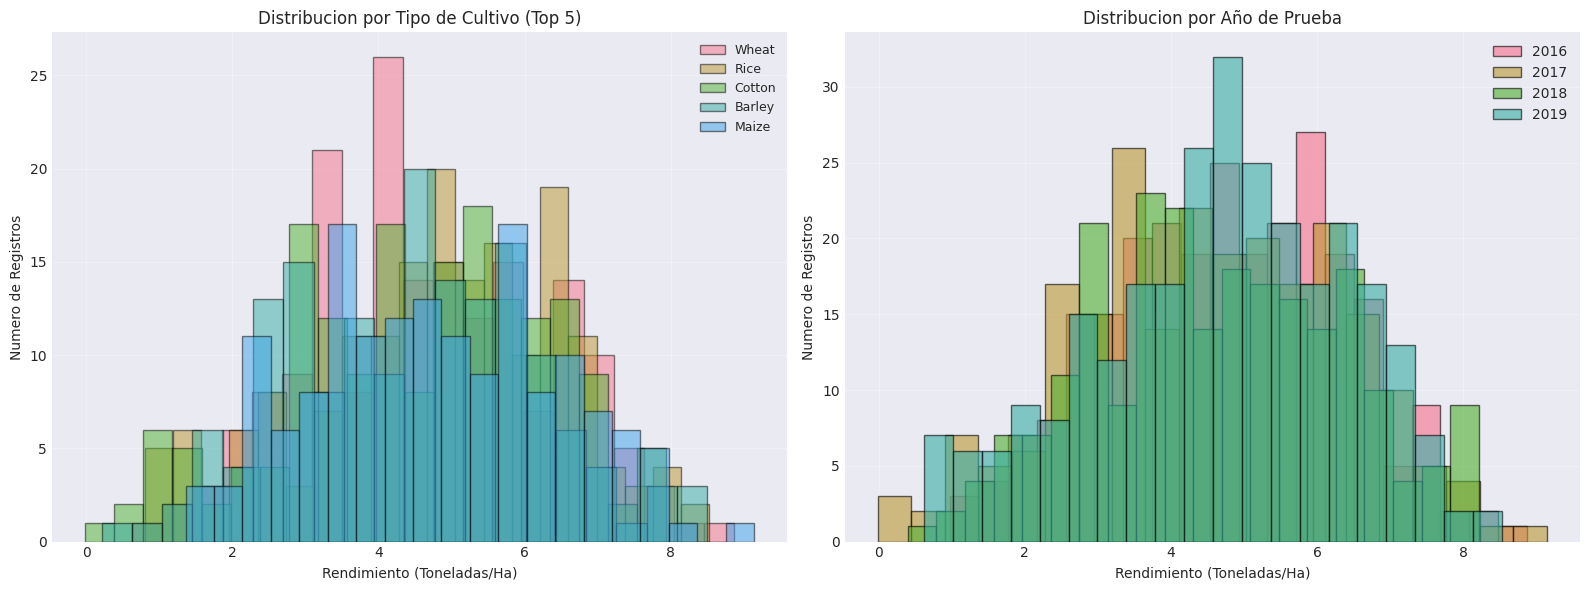

Interpretacion: Los gráficos indican que las variaciones en la producción agrícola dependen más del tipo de cultivo que del año en cuestión. Algunos cultivos, como el trigo, el arroz y la cebada, muestran rendimientos más consistentes y concentrados, mientras que el maíz y el algodón presentan mayores fluctuaciones. En contraste, los rendimientos durante los años 2016 a 2019 se ubicaron en un rango similar, con una ligera mejora y una mayor consistencia en 2018 y 2019. En general, se puede notar que los cultivos exhiben comportamientos diferentes, pero las condiciones de cada año se mantuvieron bastante constantes, sin alteraciones significativas en la productividad general.


In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

top_crops = df_graficos['Crop'].value_counts().head(5).index
for crop in top_crops:
    crop_data = df_graficos[df_graficos['Crop'] == crop]['Yield_tons_per_hectare']
    axes[0].hist(crop_data, bins=20, alpha=0.5, label=crop, edgecolor='black')
axes[0].set_xlabel('Rendimiento (Toneladas/Ha)')
axes[0].set_ylabel('Numero de Registros')
axes[0].set_title('Distribucion por Tipo de Cultivo (Top 5)')
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(True, alpha=0.3)

for year in sorted(df_graficos['Year'].unique()):
    year_data = df_graficos[df_graficos['Year'] == year]['Yield_tons_per_hectare']
    axes[1].hist(year_data, bins=20, alpha=0.6, label=f'{year}', edgecolor='black')
axes[1].set_xlabel('Rendimiento (Toneladas/Ha)')
axes[1].set_ylabel('Numero de Registros')
axes[1].set_title('Distribucion por Año de Prueba')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Interpretacion: Los gráficos indican que las variaciones en la producción agrícola dependen más del tipo de cultivo que del año en cuestión. Algunos cultivos, como el trigo, el arroz y la cebada, muestran rendimientos más consistentes y concentrados, mientras que el maíz y el algodón presentan mayores fluctuaciones. En contraste, los rendimientos durante los años 2016 a 2019 se ubicaron en un rango similar, con una ligera mejora y una mayor consistencia en 2018 y 2019. En general, se puede notar que los cultivos exhiben comportamientos diferentes, pero las condiciones de cada año se mantuvieron bastante constantes, sin alteraciones significativas en la productividad general.")

In [28]:
### Grafico 2: Rendimiento promedio por tipo de cultivo

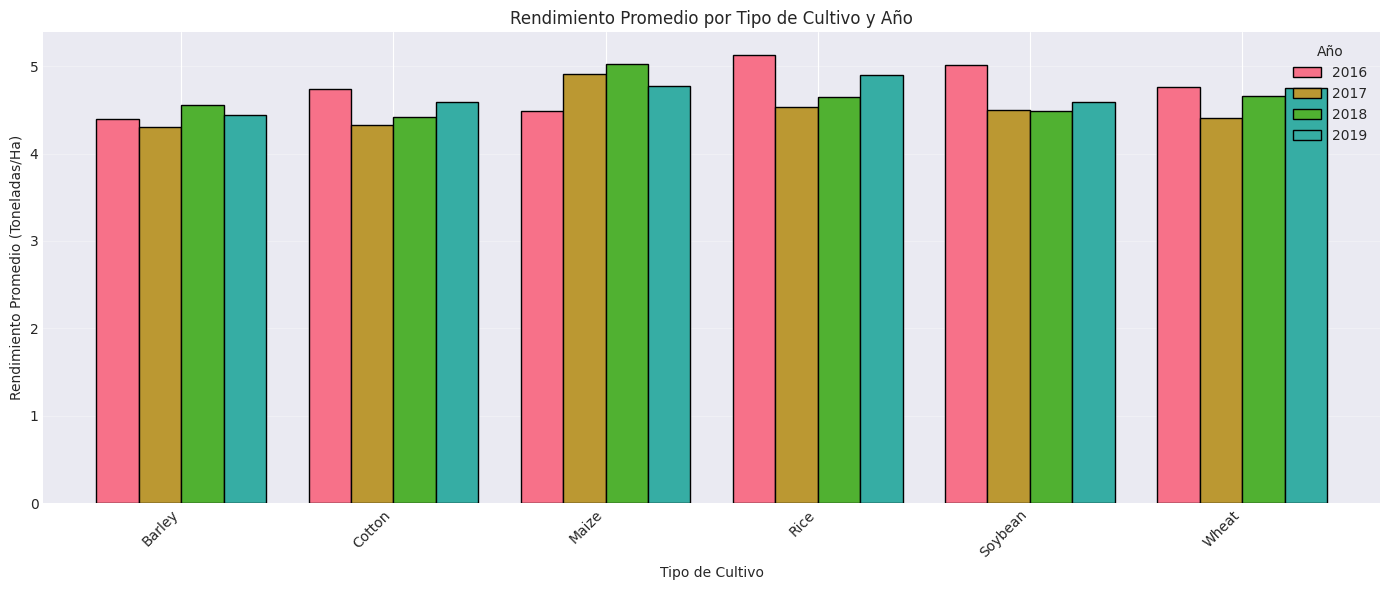

Interpretacion: Los cultivos presentan diferencias evidentes entre ellos: Rice, Wheat y Soybean tienden a registrar promedios más elevados y consistentes, mientras que Maize muestra un incremento hacia 2017–2018 y Cotton y Barley exhiben cambios menores. No se observan modificaciones drásticas de un año a otro: 2016 se destaca por picos en ciertos cultivos (como Rice), y 2018 suele ser el año con los promedios más altos para Maize. En conclusión: las variaciones significativas se encuentran más entre los distintos cultivos que entre los años, aunque existen ligeras mejoras año tras año en cultivos específicos.


In [29]:
top_6_crops = df_graficos['Crop'].value_counts().head(6).index
df_top_crops = df_graficos[df_graficos['Crop'].isin(top_6_crops)]

crop_year_yield = df_top_crops.groupby(['Crop', 'Year'])['Yield_tons_per_hectare'].mean().unstack()

fig, ax = plt.subplots(figsize=(14, 6))
crop_year_yield.plot(kind='bar', ax=ax, edgecolor='black', width=0.8)
ax.set_xlabel('Tipo de Cultivo')
ax.set_ylabel('Rendimiento Promedio (Toneladas/Ha)')
ax.set_title('Rendimiento Promedio por Tipo de Cultivo y Año')
ax.set_xticklabels(crop_year_yield.index, rotation=45, ha='right')
ax.legend(title='Año', labels=[f'{int(year)}' for year in crop_year_yield.columns])
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Interpretacion: Los cultivos presentan diferencias evidentes entre ellos: Rice, Wheat y Soybean tienden a registrar promedios más elevados y consistentes, mientras que Maize muestra un incremento hacia 2017–2018 y Cotton y Barley exhiben cambios menores. No se observan modificaciones drásticas de un año a otro: 2016 se destaca por picos en ciertos cultivos (como Rice), y 2018 suele ser el año con los promedios más altos para Maize. En conclusión: las variaciones significativas se encuentran más entre los distintos cultivos que entre los años, aunque existen ligeras mejoras año tras año en cultivos específicos.")

In [30]:
### Grafico 3: Relacion entre lluvia y rendimiento

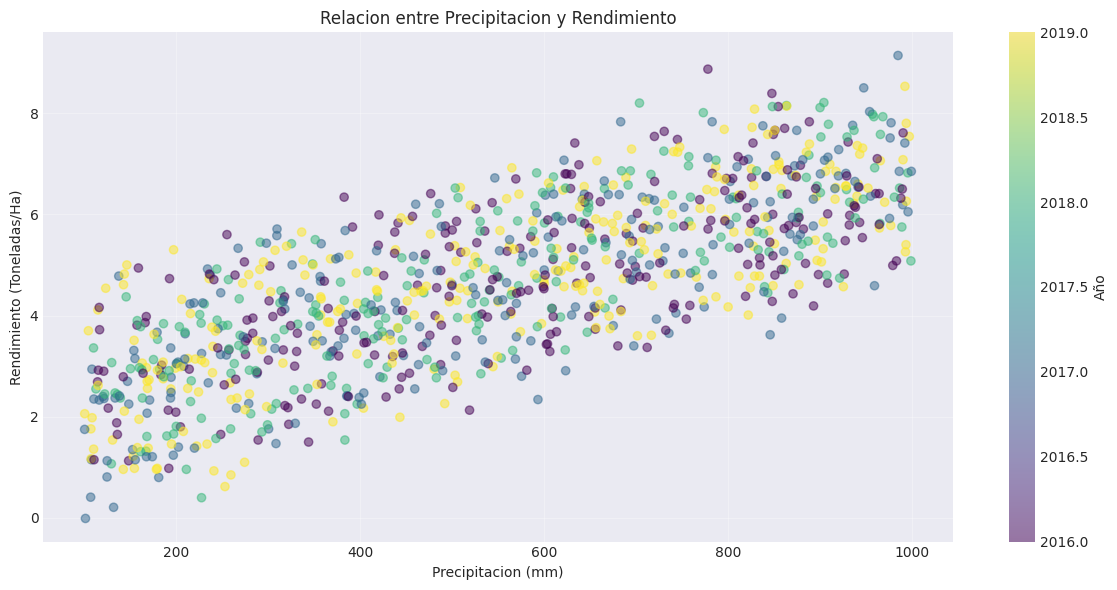

Interpretacion: Hay una conexión evidente y favorable: cuando hay más lluvia promedio, el rendimiento tiende a ser mejor en general. La variabilidad aumenta con niveles de lluvia elevados, es decir, cuando hay más precipitaciones, se observan tanto altos rendimientos como algunos moderados. Esto indica que la lluvia es beneficiosa en términos generales, aunque el rendimiento depende de otros factores como el tipo de suelo, la fertilización y el manejo. Los puntos de colores que representan cada año no presentan una separación marcada, lo que sugiere que el impacto de la lluvia es constante a lo largo de los años.


In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(df_graficos['Rainfall_mm'], df_graficos['Yield_tons_per_hectare'], 
            alpha=0.5, c=df_graficos['Year'], cmap='viridis')
plt.xlabel('Precipitacion (mm)')
plt.ylabel('Rendimiento (Toneladas/Ha)')
plt.title('Relacion entre Precipitacion y Rendimiento')
plt.colorbar(label='Año')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: Hay una conexión evidente y favorable: cuando hay más lluvia promedio, el rendimiento tiende a ser mejor en general. La variabilidad aumenta con niveles de lluvia elevados, es decir, cuando hay más precipitaciones, se observan tanto altos rendimientos como algunos moderados. Esto indica que la lluvia es beneficiosa en términos generales, aunque el rendimiento depende de otros factores como el tipo de suelo, la fertilización y el manejo. Los puntos de colores que representan cada año no presentan una separación marcada, lo que sugiere que el impacto de la lluvia es constante a lo largo de los años.")

In [32]:
### Grafico 4: Matriz de correlacion de variables numericas

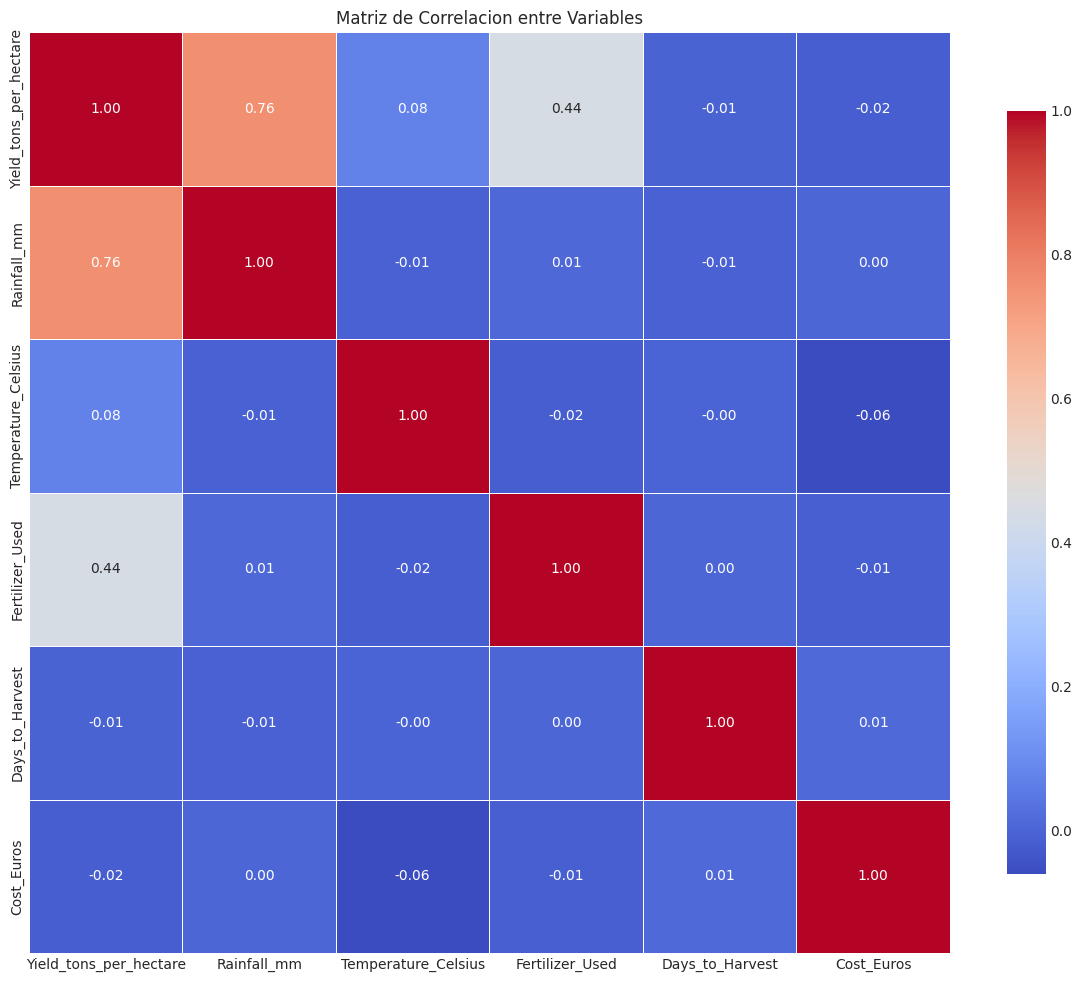

Interpretacion: La matriz valida numéricamente lo que se observa a simple vista: Lluvia en relación al rendimiento ≈ 0. 76 (correlación alta y positiva); Fertilizante en relación al rendimiento ≈ 0. 44 (moderada); Temperatura en relación al rendimiento ≈ 0. 08 (casi inexistente); las otras variables (días hasta la cosecha, costos) no presentan una relación significativa. Conclusión práctica: la lluvia y la fertilización son los elementos más relevantes para prever cambios en el rendimiento; la temperatura y los costos, tal y como se han medido, tienen poco impacto.


In [33]:
plt.figure(figsize=(12, 10))
numeric_cols = ['Yield_tons_per_hectare', 'Rainfall_mm', 'Temperature_Celsius', 
                'Fertilizer_Used', 'Days_to_Harvest', 'Cost_Euros']
correlation_matrix = df_graficos[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlacion entre Variables')
plt.tight_layout()
plt.show()

print("Interpretacion: La matriz valida numéricamente lo que se observa a simple vista: Lluvia en relación al rendimiento ≈ 0. 76 (correlación alta y positiva); Fertilizante en relación al rendimiento ≈ 0. 44 (moderada); Temperatura en relación al rendimiento ≈ 0. 08 (casi inexistente); las otras variables (días hasta la cosecha, costos) no presentan una relación significativa. Conclusión práctica: la lluvia y la fertilización son los elementos más relevantes para prever cambios en el rendimiento; la temperatura y los costos, tal y como se han medido, tienen poco impacto.")

In [34]:
### Grafico 5: Costo promedio por año y tipo de cultivo

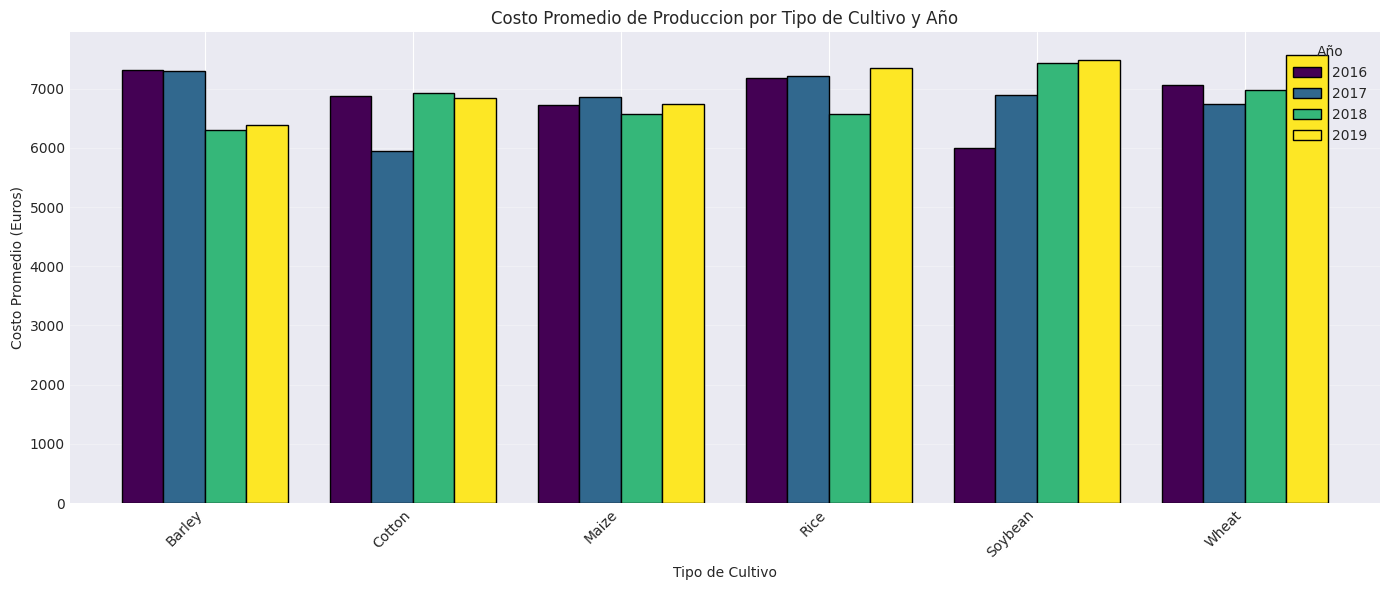

Interpretacion: Se observa un patrón evidente: los precios varían cada año, no siguen una línea recta. Por ejemplo: la cebada tuvo un precio más alto en 2016-2017 y después disminuyó en 2018; el arroz aumenta de forma constante; la soja alcanzó un máximo en 2019. Esto puede atribuirse a factores macroeconómicos, recursos o clima, pero no al rendimiento de manera directa.


In [35]:
top_6_crops = df_graficos['Crop'].value_counts().head(6).index
df_top_crops = df_graficos[df_graficos['Crop'].isin(top_6_crops)]

crop_year_cost = df_top_crops.groupby(['Crop', 'Year'])['Cost_Euros'].mean().unstack()

fig, ax = plt.subplots(figsize=(14, 6))
crop_year_cost.plot(kind='bar', ax=ax, edgecolor='black', width=0.8, colormap='viridis')
ax.set_xlabel('Tipo de Cultivo')
ax.set_ylabel('Costo Promedio (Euros)')
ax.set_title('Costo Promedio de Produccion por Tipo de Cultivo y Año')
ax.set_xticklabels(crop_year_cost.index, rotation=45, ha='right')
ax.legend(title='Año', labels=[f'{int(year)}' for year in crop_year_cost.columns])
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Interpretacion: Se observa un patrón evidente: los precios varían cada año, no siguen una línea recta. Por ejemplo: la cebada tuvo un precio más alto en 2016-2017 y después disminuyó en 2018; el arroz aumenta de forma constante; la soja alcanzó un máximo en 2019. Esto puede atribuirse a factores macroeconómicos, recursos o clima, pero no al rendimiento de manera directa.")

In [36]:
### Grafico 6: Impacto del fertilizante en costo y duracion del ciclo

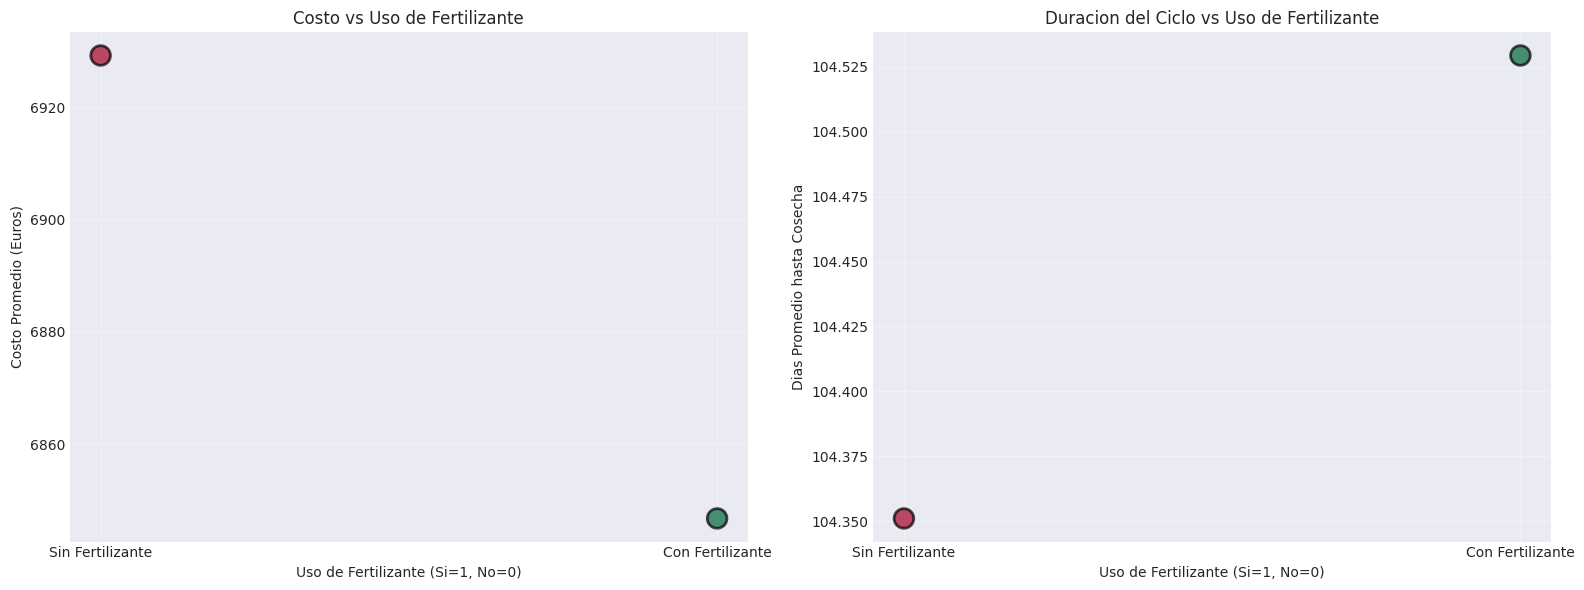

Estadisticas comparativas:

CON Fertilizante:
  - Costo promedio: 6846.80 euros
  - Dias hasta cosecha: 104.53 dias
  - Rendimiento promedio: 5.38 ton/ha

SIN Fertilizante:
  - Costo promedio: 6929.21 euros
  - Dias hasta cosecha: 104.35 dias
  - Rendimiento promedio: 3.88 ton/ha

Interpretacion: El uso de fertilizantes contribuye a disminuir el gasto promedio en la producción y acorta un poco la duración del cultivo, aunque la variación en días es mínima. La ventaja radica más en el aspecto financiero que en el tiempo: cultivar sin fertilizantes implica un mayor costo. Esto indica que el uso de fertilizantes es provechoso a largo plazo.


In [37]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fertilizer_groups = df_graficos.groupby('Fertilizer_Used').agg({
    'Cost_Euros': 'mean',
    'Days_to_Harvest': 'mean',
    'Yield_tons_per_hectare': 'mean'
}).reset_index()

axes[0].scatter(fertilizer_groups['Fertilizer_Used'], fertilizer_groups['Cost_Euros'], 
                s=200, alpha=0.7, c=fertilizer_groups['Yield_tons_per_hectare'], 
                cmap='RdYlGn', edgecolor='black', linewidth=2)
axes[0].set_xlabel('Uso de Fertilizante (Si=1, No=0)')
axes[0].set_ylabel('Costo Promedio (Euros)')
axes[0].set_title('Costo vs Uso de Fertilizante')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Sin Fertilizante', 'Con Fertilizante'])
axes[0].grid(True, alpha=0.3)

axes[1].scatter(fertilizer_groups['Fertilizer_Used'], fertilizer_groups['Days_to_Harvest'], 
                s=200, alpha=0.7, c=fertilizer_groups['Yield_tons_per_hectare'], 
                cmap='RdYlGn', edgecolor='black', linewidth=2)
axes[1].set_xlabel('Uso de Fertilizante (Si=1, No=0)')
axes[1].set_ylabel('Dias Promedio hasta Cosecha')
axes[1].set_title('Duracion del Ciclo vs Uso de Fertilizante')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Sin Fertilizante', 'Con Fertilizante'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

with_fert = df_graficos[df_graficos['Fertilizer_Used'] == 1]
without_fert = df_graficos[df_graficos['Fertilizer_Used'] == 0]

print(f"Estadisticas comparativas:")
print(f"\nCON Fertilizante:")
print(f"  - Costo promedio: {with_fert['Cost_Euros'].mean():.2f} euros")
print(f"  - Dias hasta cosecha: {with_fert['Days_to_Harvest'].mean():.2f} dias")
print(f"  - Rendimiento promedio: {with_fert['Yield_tons_per_hectare'].mean():.2f} ton/ha")
print(f"\nSIN Fertilizante:")
print(f"  - Costo promedio: {without_fert['Cost_Euros'].mean():.2f} euros")
print(f"  - Dias hasta cosecha: {without_fert['Days_to_Harvest'].mean():.2f} dias")
print(f"  - Rendimiento promedio: {without_fert['Yield_tons_per_hectare'].mean():.2f} ton/ha")

print(f"\nInterpretacion: El uso de fertilizantes contribuye a disminuir el gasto promedio en la producción y acorta un poco la duración del cultivo, aunque la variación en días es mínima. La ventaja radica más en el aspecto financiero que en el tiempo: cultivar sin fertilizantes implica un mayor costo. Esto indica que el uso de fertilizantes es provechoso a largo plazo.")

In [38]:
### Grafico 7: Tiempo de cosecha por tipo de cultivo y tipo de suelo

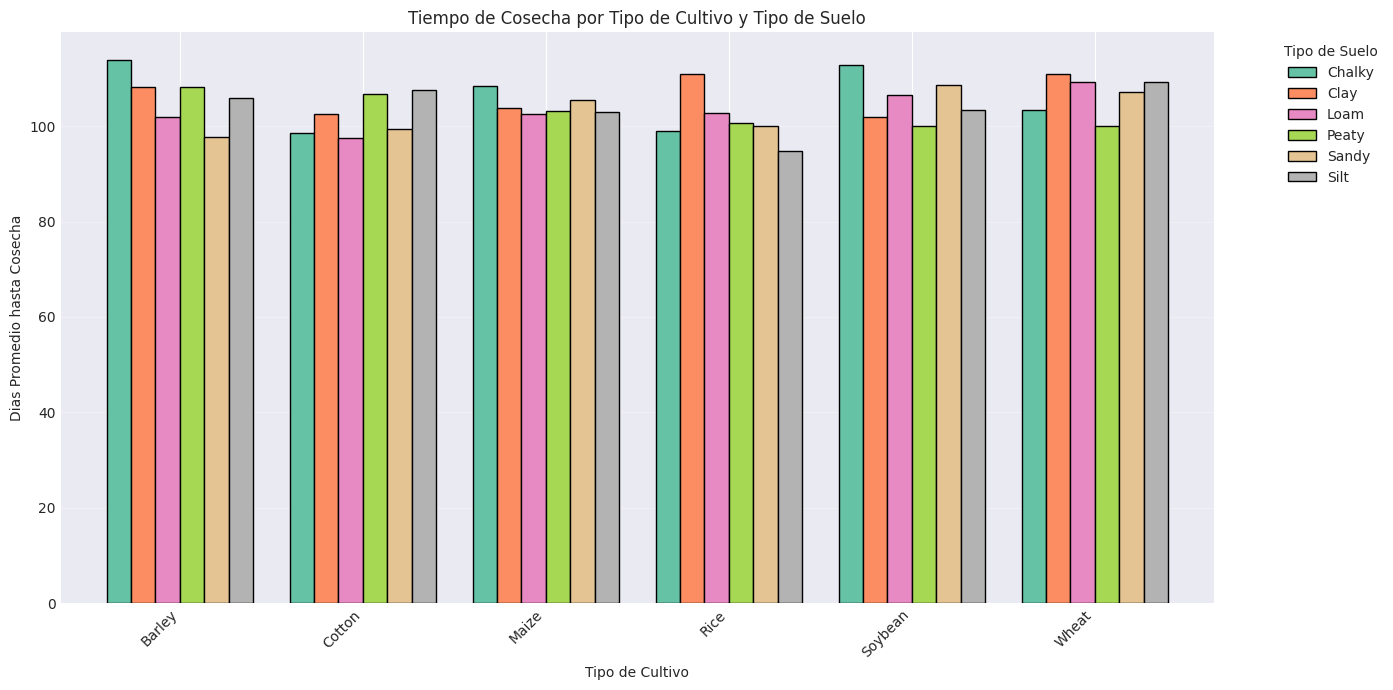

Analisis de tiempo de cosecha por tipo de suelo:

Sandy: 102.92 dias promedio
Clay: 107.00 dias promedio
Loam: 103.36 dias promedio
Silt: 103.93 dias promedio
Peaty: 103.39 dias promedio
Chalky: 106.01 dias promedio

Interpretacion: Aquí se observa que la clase de terreno influye mucho en la longitud del ciclo. Suelos como el Calcáreo y el Limoso suelen extender el tiempo hasta la cosecha, mientras que el Franco y el Turba tienden a acortar ese periodo. Los cultivos no presentan grandes diferencias, pero por ejemplo, la Cebada y la Soja tardan más que el Algodón y el Arroz. En otras palabras, el tiempo de productividad es más dependiente del tipo de suelo que del tipo de cultivo.


In [39]:
top_6_crops = df_graficos['Crop'].value_counts().head(6).index
df_top_crops = df_graficos[df_graficos['Crop'].isin(top_6_crops)]

crop_soil_days = df_top_crops.groupby(['Crop', 'Soil_Type'])['Days_to_Harvest'].mean().unstack()

fig, ax = plt.subplots(figsize=(14, 7))
crop_soil_days.plot(kind='bar', ax=ax, edgecolor='black', width=0.8, colormap='Set2')
ax.set_xlabel('Tipo de Cultivo')
ax.set_ylabel('Dias Promedio hasta Cosecha')
ax.set_title('Tiempo de Cosecha por Tipo de Cultivo y Tipo de Suelo')
ax.set_xticklabels(crop_soil_days.index, rotation=45, ha='right')
ax.legend(title='Tipo de Suelo', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

soil_types = df_graficos['Soil_Type'].unique()
print("Analisis de tiempo de cosecha por tipo de suelo:\n")
for soil in soil_types:
    soil_data = df_top_crops[df_top_crops['Soil_Type'] == soil]
    avg_days = soil_data['Days_to_Harvest'].mean()
    print(f"{soil}: {avg_days:.2f} dias promedio")

print(f"\nInterpretacion: Aquí se observa que la clase de terreno influye mucho en la longitud del ciclo. Suelos como el Calcáreo y el Limoso suelen extender el tiempo hasta la cosecha, mientras que el Franco y el Turba tienden a acortar ese periodo. Los cultivos no presentan grandes diferencias, pero por ejemplo, la Cebada y la Soja tardan más que el Algodón y el Arroz. En otras palabras, el tiempo de productividad es más dependiente del tipo de suelo que del tipo de cultivo.")

In [40]:
### Grafico 8: Rendimiento vs Temperatura por region

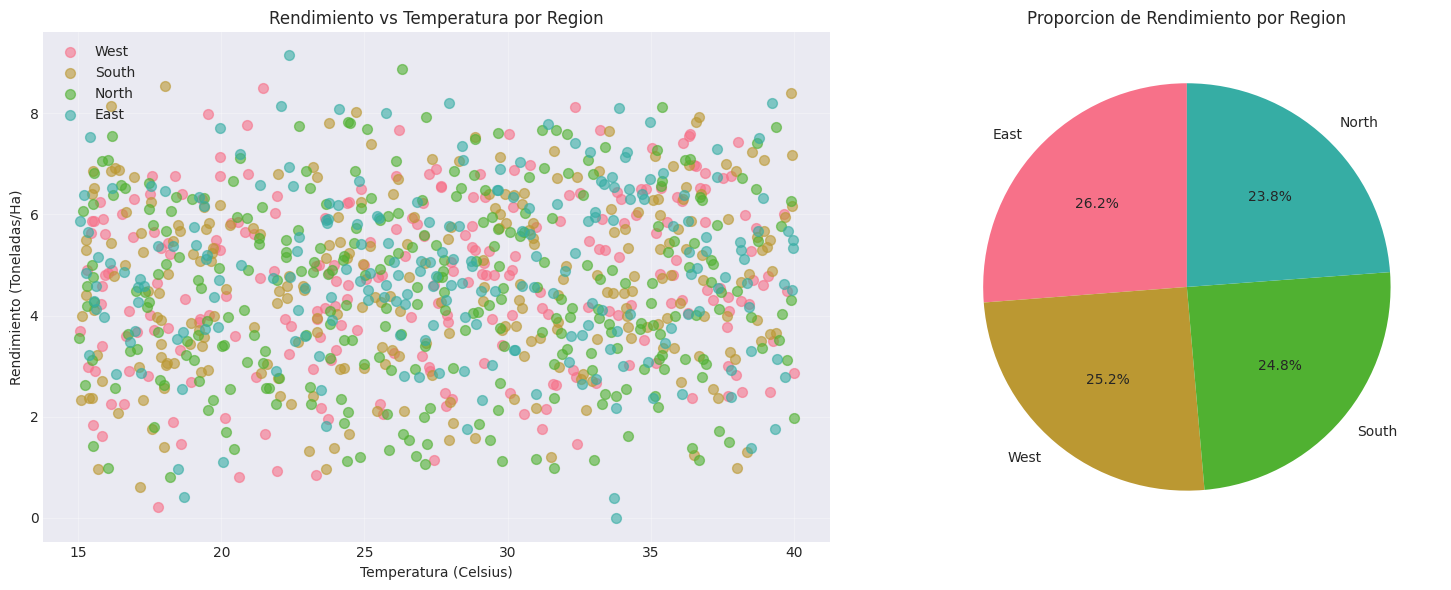

Interpretacion: En el diagrama de dispersión, todas las zonas generan rendimientos comparables sin una tendencia definida relacionada con la temperatura. Aun en condiciones de altas temperaturas (aproximadamente 35–40°C), no se observa una disminución notable en el rendimiento. El gráfico circular indica que la región Este tiene una leve ventaja en la proporción del rendimiento total, seguida por las regiones Oeste, Sur y Norte. Esto sugiere que el Este podría tener una mezcla más equilibrada de condiciones climáticas, métodos de cultivo o calidad del suelo.


In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

regions = df_graficos['Region'].unique()
for region in regions:
    region_data = df_graficos[df_graficos['Region'] == region]
    axes[0].scatter(region_data['Temperature_Celsius'], 
                   region_data['Yield_tons_per_hectare'], 
                   alpha=0.6, label=region, s=50)

axes[0].set_xlabel('Temperatura (Celsius)')
axes[0].set_ylabel('Rendimiento (Toneladas/Ha)')
axes[0].set_title('Rendimiento vs Temperatura por Region')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

region_yield = df_graficos.groupby('Region')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
axes[1].pie(region_yield, labels=region_yield.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporcion de Rendimiento por Region')

plt.tight_layout()
plt.show()

print("Interpretacion: En el diagrama de dispersión, todas las zonas generan rendimientos comparables sin una tendencia definida relacionada con la temperatura. Aun en condiciones de altas temperaturas (aproximadamente 35–40°C), no se observa una disminución notable en el rendimiento. El gráfico circular indica que la región Este tiene una leve ventaja en la proporción del rendimiento total, seguida por las regiones Oeste, Sur y Norte. Esto sugiere que el Este podría tener una mezcla más equilibrada de condiciones climáticas, métodos de cultivo o calidad del suelo.")

In [42]:
### Grafico 9: Analisis de rentabilidad (Rendimiento vs Costo)

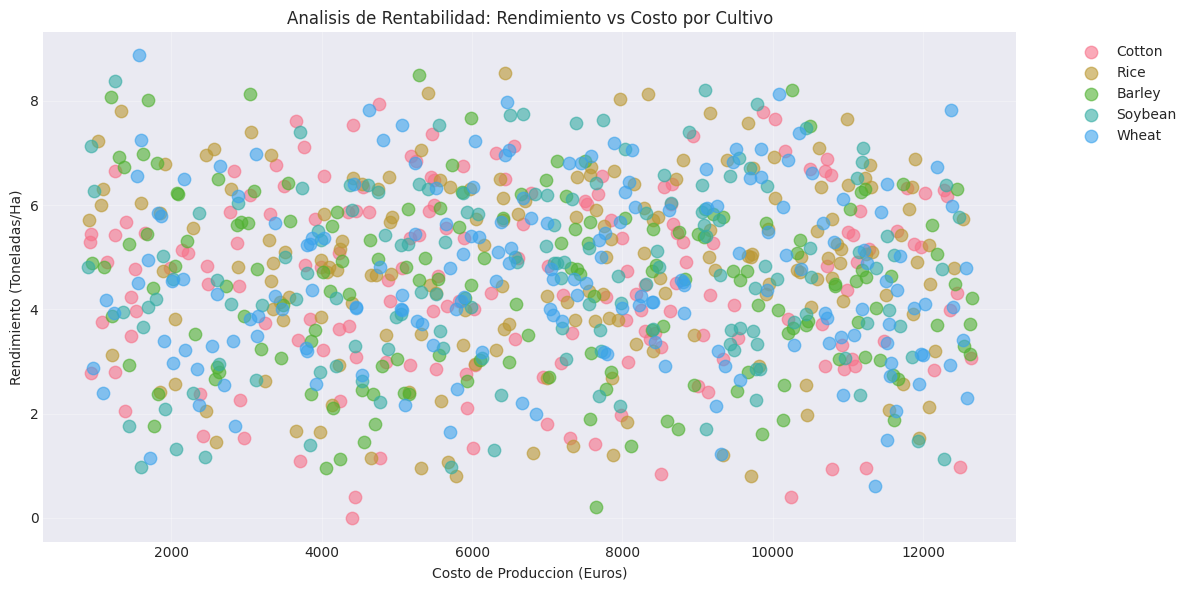

Interpretacion: El gráfico indica que no hay una conexión sólida entre el costo y el rendimiento para ningun cultivo. En otras palabras, invertir más dinero no asegura obtener una mayor producción. Los datos están bastante esparcidos: cultivos como la soja y el trigo suelen ofrecer buenos rendimientos incluso con un costo moderado; por otro lado, el algodón y el arroz muestran mucha diversidad: hay ejemplos de altos costos con bajo rendimiento y viceversa. En resumen: la rentabilidad se ve más influenciada por otros factores (como la ubicación, el tipo de suelo y el manejo) que por el costo en sí.


In [43]:
plt.figure(figsize=(12, 6))

df_graficos['Eficiencia'] = df_graficos['Yield_tons_per_hectare'] / (df_graficos['Cost_Euros'] / 1000)

for crop in df_graficos['Crop'].unique()[:5]:
    crop_data = df_graficos[df_graficos['Crop'] == crop]
    plt.scatter(crop_data['Cost_Euros'], crop_data['Yield_tons_per_hectare'], 
                alpha=0.6, s=80, label=crop)

plt.xlabel('Costo de Produccion (Euros)')
plt.ylabel('Rendimiento (Toneladas/Ha)')
plt.title('Analisis de Rentabilidad: Rendimiento vs Costo por Cultivo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: El gráfico indica que no hay una conexión sólida entre el costo y el rendimiento para ningun cultivo. En otras palabras, invertir más dinero no asegura obtener una mayor producción. Los datos están bastante esparcidos: cultivos como la soja y el trigo suelen ofrecer buenos rendimientos incluso con un costo moderado; por otro lado, el algodón y el arroz muestran mucha diversidad: hay ejemplos de altos costos con bajo rendimiento y viceversa. En resumen: la rentabilidad se ve más influenciada por otros factores (como la ubicación, el tipo de suelo y el manejo) que por el costo en sí.")

In [44]:
### Grafico 10: Evolucion mensual del rendimiento por año

NameError: name 'months_names' is not defined

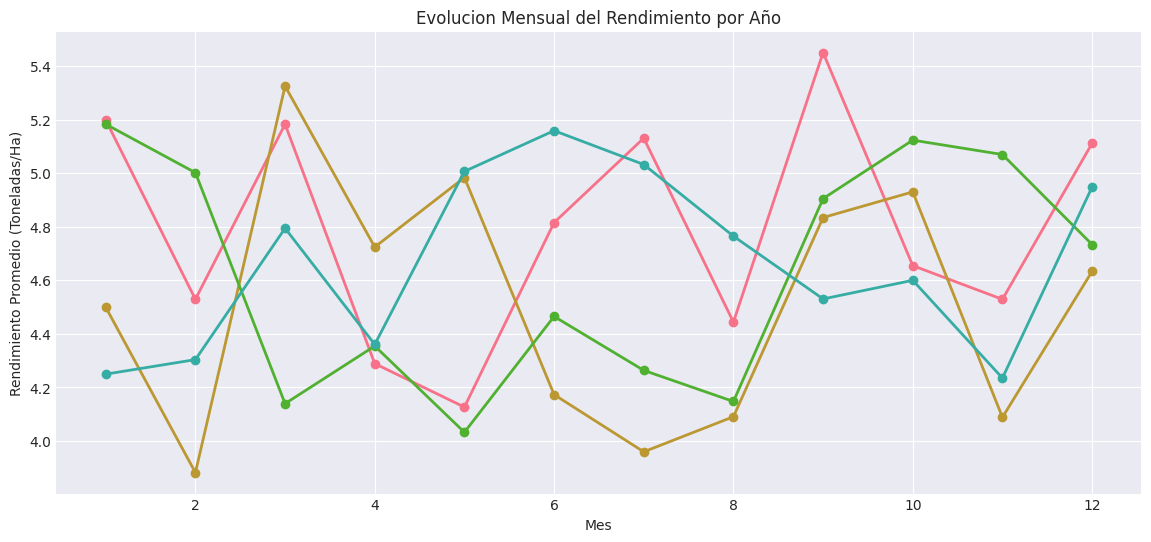

In [45]:
plt.figure(figsize=(14, 6))

for year in sorted(df_graficos['Year'].unique()):
    year_data = df_graficos[df_graficos['Year'] == year]
    monthly_yield = year_data.groupby('Month')['Yield_tons_per_hectare'].mean()
    plt.plot(monthly_yield.index, monthly_yield.values, marker='o', linewidth=2, 
             label=f'Año {year}', markersize=6)

plt.xlabel('Mes')
plt.ylabel('Rendimiento Promedio (Toneladas/Ha)')
plt.title('Evolucion Mensual del Rendimiento por Año')
plt.xticks(range(1, 13), months_names)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: Los histogramas indican que todas las especies se agrupan principalmente en rendimientos de 3 a 6 t/ha, con escasos casos de extremos muy bajos o muy altos. A lo largo de los años, el patrón continúa siendo parecido: 2017 y 2018 parecen mostrar rendimientos un poco más elevados y constantes, mientras que 2016 presenta una mayor dispersión (más variabilidad). Esto sugiere un avance técnico con el tiempo.")